# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification problem is where you try to clssify something as one thing or another. 
* Binary Classification
* Multiclass Classification
* Multilabel Classification

### Creating Data to View and Fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out the features
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now, let's visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


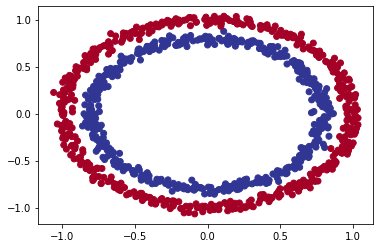

In [5]:
# Visualize with a plt
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

🛠 **Exercise:** Before pushing forward, spend 10 minutes playing around with https://playground.tensorflow.org building and running different neural networks. See what happens when you change different hyperparameters. 

### Input and Output Shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [8]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in Modeling

The steps in modeling with TensorFlow are:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [77]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model usig the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
history_1 = model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 549us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 516us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 484us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 516us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 516us/step - loss: 0.6942 - accuracy: 0.4820


In [10]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 484us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy, it's performing as if it is guessing

Let's add an extra layer

In [78]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X, y, epochs=100, verbose=0)

In [12]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 452us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

### Improving Our Model

Let's look into our bag of tricks to see how we can improve our model. 

1. Create a model - we might add more layers or increase the number of hidden units within a layer
2. Comile a model - we might want to choose a different optimization function such as Adam instead of SGD
3. Fit a model - perhaps we might fit our model for more epochs

In [79]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )

# 3. Fit the model
history_3 = model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 613us/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 567us/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 548us/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 613us/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 581us/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 613us/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 581us/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 599us/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 566us/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 613us/step - loss: 0.6944 - accura

In [14]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 484us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

To visualize our model's predicitions, let's create a function `plot_decision_boundary`, which will:
    
* Take in a trained model, features, and labels
* Create a meshgrid of the different X values
* Make predicitons across the mesh grid
* Plot the predictions as well as a line between the different zones where each unique class falls

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our predictions to get them ready
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 383us/step
Doing binary classification


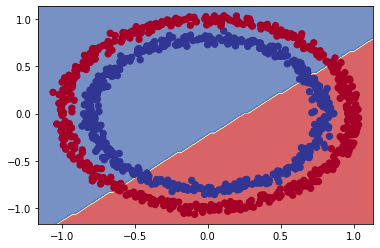

In [16]:
# Check out the predicitions our model is making
plot_decision_boundary(model_3, X=X, y=y)

In [17]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression datat into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

Won't work because we compiled our model for binary classification.

Let's change the model to suit our data

In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 750us/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 500us/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 750us/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 750us/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 750us/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 750us/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 750us/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 500us/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 763us/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [===================

2/2 [==============================] - 0s 2ms/step


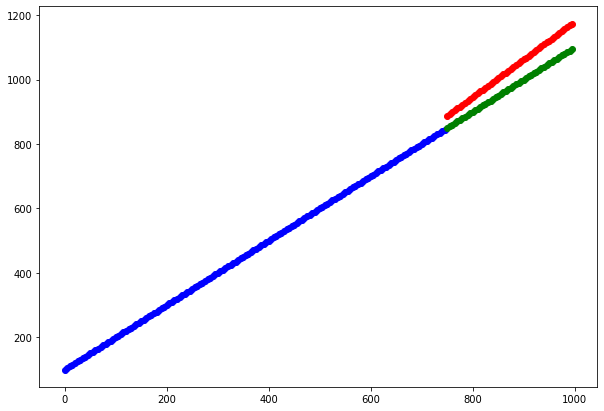

In [19]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")

### The Missing Piece: Non-Linearity

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 581us/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 549us/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 549us/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 541us/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 549us/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 522us/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 549us/step - loss: 3.3803 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 516us/step - loss: 3.2273 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 534us/step - loss: 2.8035 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 548us/step - loss: 2.5701 - accura

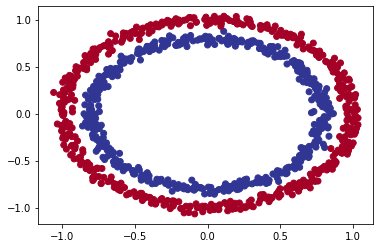

In [21]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 391us/step
Doing binary classification


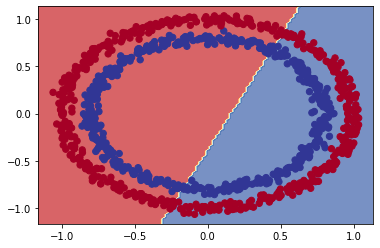

In [22]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X=X, y=y);

Lets' try to build our first neural network with a non-linear activation function. 

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 549us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 549us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 516us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 516us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 516us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 505us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 516us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 533us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 534us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 549us/step - loss: 3.7419 - accura

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_6 = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 570us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 581us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 516us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 566us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 567us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 598us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 613us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 581us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 548us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 582us/step - loss: 7.7125 - accura

32/32 [==============================] - 0s 549us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 161/250
32/32 [==============================] - 0s 549us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 162/250
32/32 [==============================] - 0s 549us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 163/250
32/32 [==============================] - 0s 564us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 164/250
32/32 [==============================] - 0s 548us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/250
32/32 [==============================] - 0s 533us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/250
32/32 [==============================] - 0s 549us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/250
32/32 [==============================] - 0s 516us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/250
32/32 [==============================] - 0s 549us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/250
32/32 [==============================] - 0s 581us/step - loss: 7.7125 - a

313/313 [==============================] - 0s 398us/step
Doing binary classification


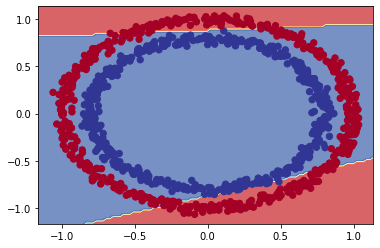

In [25]:
plot_decision_boundary(model_6, X, y)

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_7 = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 574us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 516us/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 548us/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 549us/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 516us/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 538us/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 581us/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 581us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 549us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 565us/step - loss: 0.6766 - accura

In [27]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 484us/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

313/313 [==============================] - 0s 394us/step
Doing binary classification


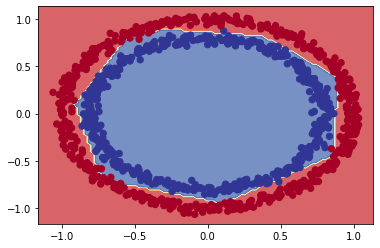

In [28]:
plot_decision_boundary(model_7, X, y)

🤔 **Question:** What's wrong with the predictions we have made? Are we evaluating our model correctly?

🔑 **Note:** The combination of linear and non-linear functions is one of the key fundamentals of neural networks

Now we've discussed the concept of linear and non-linear functions, let's see them in action

In [29]:
# Create a toy tensor (similar to the data we pass in our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

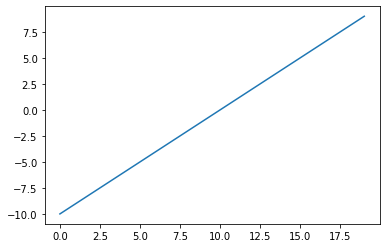

In [30]:
# Visualize our toy tensor
plt.plot(A);

In [31]:
# Let's start by replicating sigmoid | sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

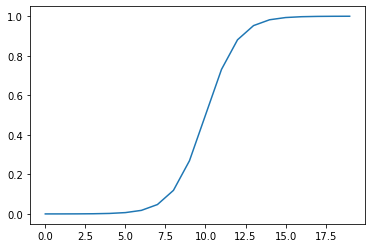

In [32]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [33]:
# Replicate ReLU | ReLU(x) = max(x, 0)
def relu(x):
    return tf.maximum(0, x)

# Use the ReLU function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

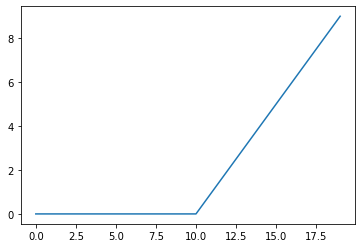

In [34]:
# Plot our toy tensor modified by ReLU
plt.plot(relu(A))

In [35]:
# Let's try the linear activation function
def linear(x):
    return x

# Use the linear function on our toy tensor
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

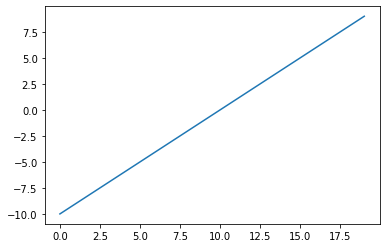

In [36]:
plt.plot(linear(A))

### Evaluating and Improving our Classification Model

So far, we've been training and testing on the same dataset, however, in machine learning, this is basically a sin. 

Let's create a training and test set.

In [37]:
# Check how many samples we have
len(X)

1000

In [38]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [71]:
# Recreate a model to fit to training data and evaluate on the testing data

# Set random see
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 542us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 542us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 500us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 542us/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 542us/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 542us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 500us/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 500us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 583us/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 500us/step - loss: 0.5714 - accuracy: 0.7738

In [72]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 667us/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

313/313 [==============================] - 0s 382us/step
Doing binary classification
313/313 [==============================] - 0s 394us/step
Doing binary classification


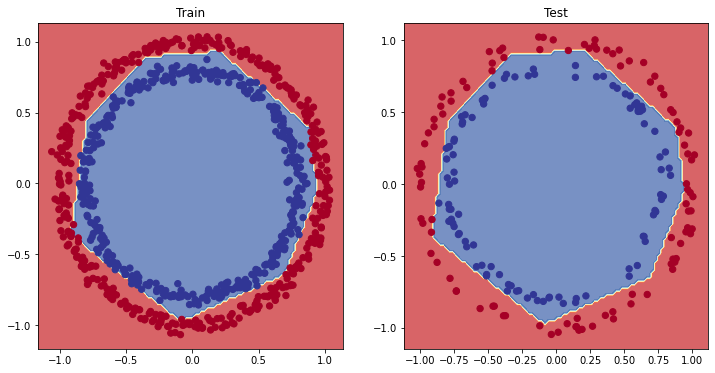

In [73]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show();

### Plot the loss (or training) curves

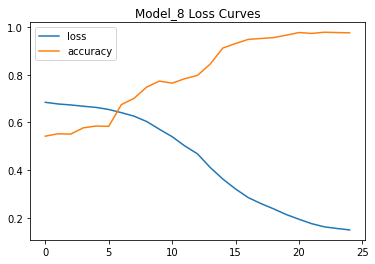

In [90]:
pd.DataFrame(history_8.history).plot();
plt.title("Model_8 Loss Curves");

🔑 **Note:** For many problems, the loss function going down means that the model is improving. The predictions it's making are getting closer to the ground truth labels.

### Finding the Best Learning Rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* it's training
* Another model (we could use the same one as above, but we're practicing building models)
* A modified loss curves plot

In [91]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 542us/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 542us/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 500us/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 542us/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 500us/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 500us/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 542us/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 542us/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

Text(0.5, 1.0, 'Model_9 Loss Curves')

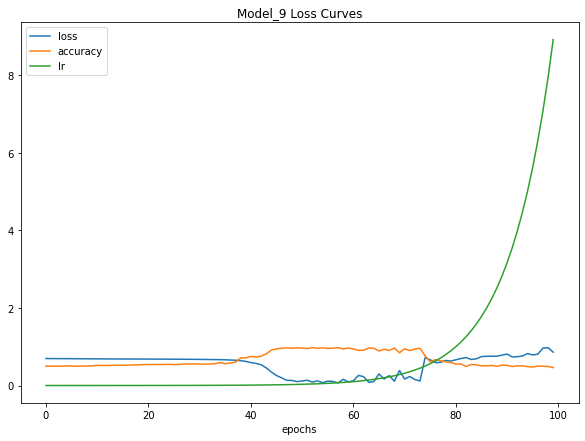

In [94]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");
plt.title("Model_9 Loss Curves")

Text(0.5, 1.0, 'Learning Rate vs Loss')

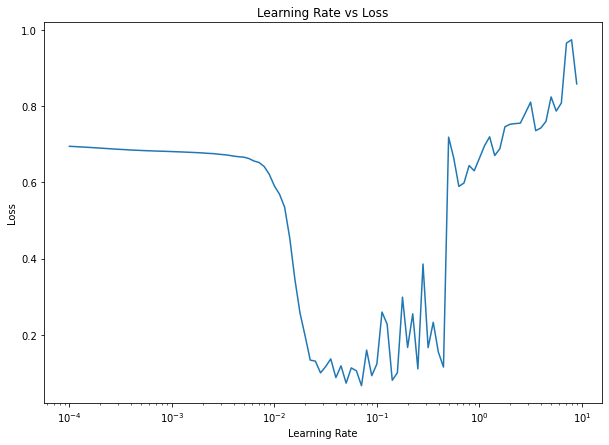

In [98]:
# Plot the learning rate values vs the loss
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [99]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [111]:

# Let's try using a higher *ideal* learning rate with the same model
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model 
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 542us/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 500us/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 542us/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 500us/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 484us/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 542us/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 500us/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 500us/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 500us/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 542us/step - loss: 0.2512 - accuracy: 0.9500

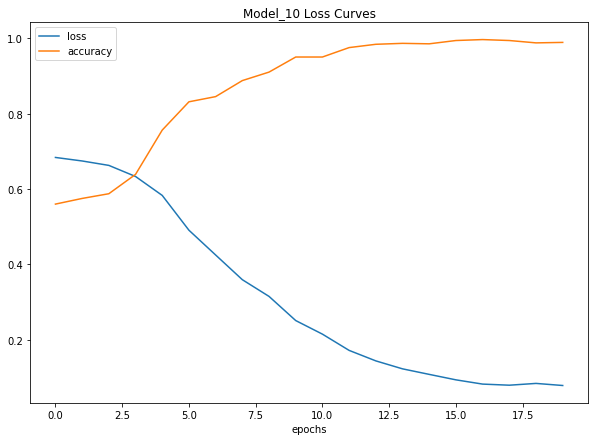

In [112]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")
plt.title("Model_10 Loss Curves");

In [113]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 667us/step - loss: 0.0574 - accuracy: 0.9900


[0.057401809841394424, 0.9900000095367432]

In [114]:
# Evalutate model_8 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 667us/step - loss: 0.1247 - accuracy: 1.0000


[0.12468855082988739, 1.0]

313/313 [==============================] - 0s 389us/step
Doing binary classification
313/313 [==============================] - 0s 403us/step
Doing binary classification


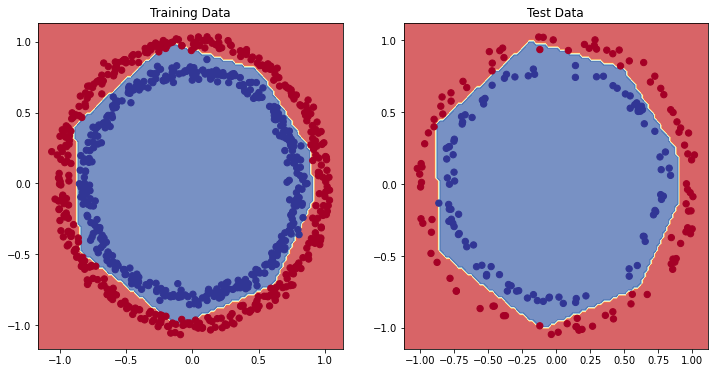

In [117]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training Data")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model_10, X_test, y_test)
plt.show();

### More Classification Evaluation Metrics

Alongside visualizeing our models as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report (from SciKit-Learn)
   

In [123]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on test set: {loss}')
print(f'Model accuracy on test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 667us/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test set: 0.057401809841394424
Model accuracy on test set: 99.00%


How about a confusion matrix?

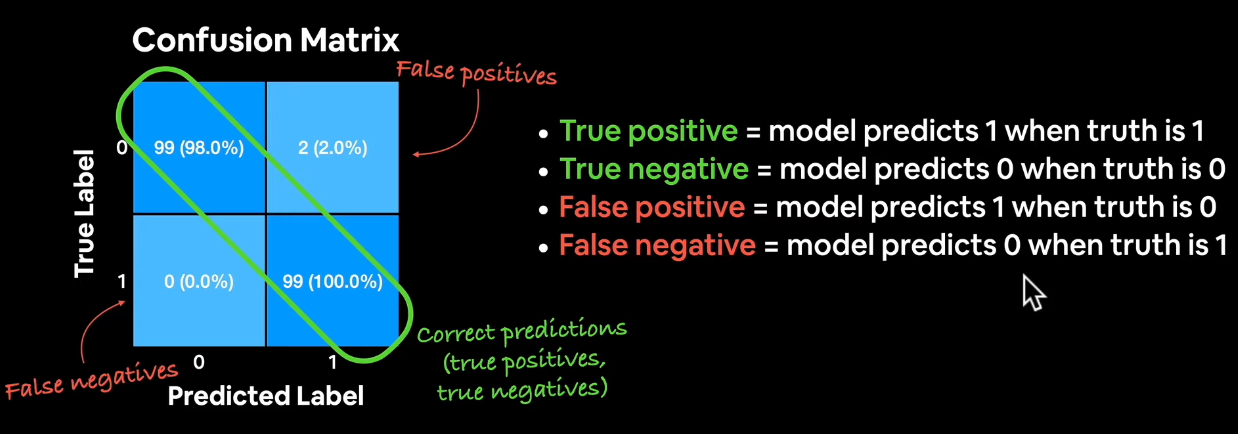

In [133]:
# Import confusion matrix library from SciKit-Learn
from sklearn.metrics import confusion_matrix

# Make predicitons
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 667us/step


In [126]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [131]:
y_preds[:10]

array([[9.8526543e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622897e-01],
       [1.8126909e-02],
       [9.6829069e-01],
       [1.9746717e-02],
       [9.9967164e-01],
       [5.6458672e-04]], dtype=float32)

Oops... Looks like our predictions array has come out in **prediciton probability** form, the standard output from the sigmoid (or softmax) activation functions. 

In [134]:
# Convert our prediciton probablities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [137]:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

How about we prettify our confusion matrix?

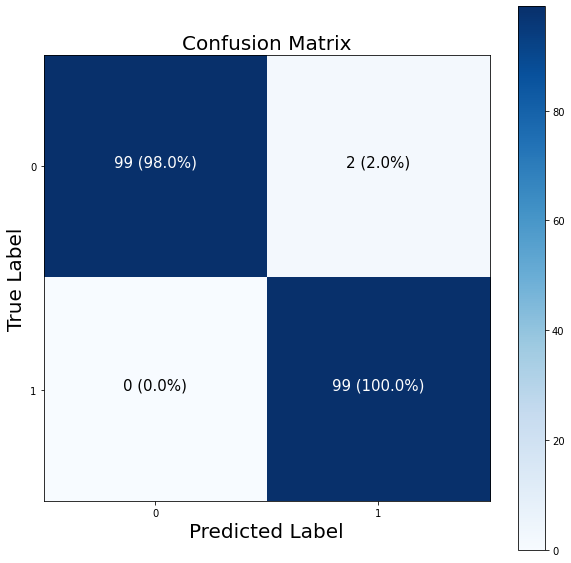

In [144]:
# Note: The confusion matrix code we're about to write is a remix of SciKit-Learn's plot_confusion_matrix function

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)

# Working with a Larger Example (Multiclass Classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Show the first training example
print(f'Training Sample:\n{train_data[0]}\n')
print(f'Training Label:\n{train_labels[0]}\n')

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

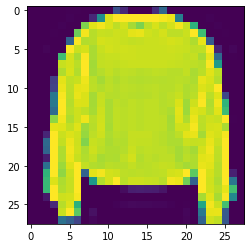

In [6]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [7]:
# Check our sample's label
train_labels[7]

2

In [8]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/Top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle Boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/Top')

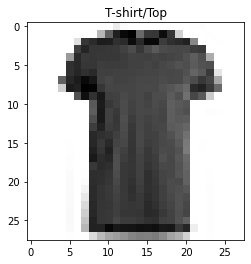

In [9]:
# Plot another example image and it's label
index=17
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

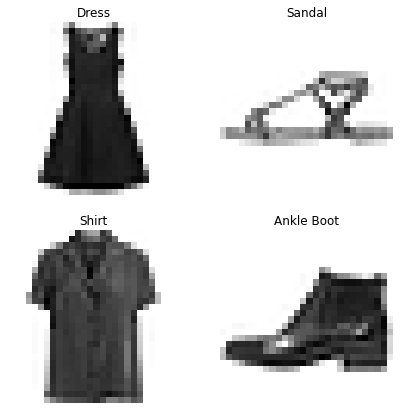

In [19]:
# Plot multiple random images of Fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Building a Multiclass Classification Model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input Shape - 28x28 (The shape of one image)
* Output Shape - 10 (One per class)
* Loss Function - tf.keras.losses.CategoricalCrossentropy()
* Output Activation - Softmax (not sigmoid)

In [214]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Our data needs to be flattened from (28, 28) to (None, 784)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # Without 'Sparse' expects one-hot encoding
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Fit the model
history_11 = model_11.fit(train_data, 
                          tf.one_hot(train_labels, depth=10), 
                          epochs=10, 
                          validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 2s 709us/step - loss: 2.1629 - accuracy: 0.1628 - val_loss: 1.8070 - val_accuracy: 0.2133
Epoch 2/10
1875/1875 [==============================] - 1s 658us/step - loss: 1.7039 - accuracy: 0.2534 - val_loss: 1.6755 - val_accuracy: 0.2821
Epoch 3/10
1875/1875 [==============================] - 1s 663us/step - loss: 1.6331 - accuracy: 0.2817 - val_loss: 1.6065 - val_accuracy: 0.3005
Epoch 4/10
1875/1875 [==============================] - 1s 655us/step - loss: 1.6032 - accuracy: 0.2863 - val_loss: 1.6056 - val_accuracy: 0.2981
Epoch 5/10
1875/1875 [==============================] - 1s 658us/step - loss: 1.5975 - accuracy: 0.2932 - val_loss: 1.6016 - val_accuracy: 0.2884
Epoch 6/10
1875/1875 [==============================] - 1s 659us/step - loss: 1.5913 - accuracy: 0.2967 - val_loss: 1.5698 - val_accuracy: 0.3157
Epoch 7/10
1875/1875 [==============================] - 1s 666us/step - loss: 1.5738 - accuracy: 0.3153 - val_loss: 1.5715 -

In [215]:
# Check the model summary
model_11.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_120 (Dense)           (None, 4)                 3140      
                                                                 
 dense_121 (Dense)           (None, 4)                 20        
                                                                 
 dense_122 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [216]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in the tensors they try to find patterens in between 0 and 1

In [21]:
# We can get out training and testing data to be between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [218]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_12 = model_12.fit(train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 701us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

🔑 **Note:** Neural networks tend to prefer data in numerical form, as well as scaled/normalized (numbers between 0 & 1)

<AxesSubplot:title={'center':'Normalized Data'}>

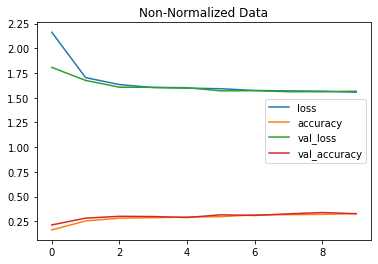

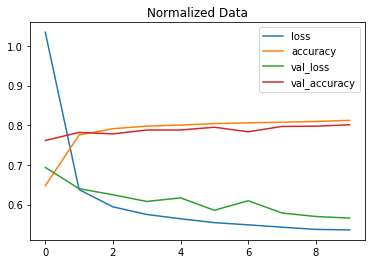

In [219]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_11.history).plot(title="Non-Normalized Data")
# Plot normalized data loss curves
pd.DataFrame(history_12.history).plot(title="Normalized Data")

🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

### Finding the Ideal Learning Rate

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 4. Fit the model
history_13 = model_13.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm, test_labels),
                          callbacks=lr_scheduler)

Epoch 1/40
1875/1875 [==============================] - 1s 690us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 641us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 635us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 634us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 640us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 629us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

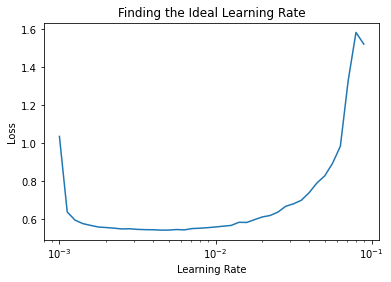

In [34]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_13.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')

In [35]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# 3. Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 685us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 1s 626us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 1s 642us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 1s 634us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 1s 661us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 1s 660us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 1s 665us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

### Evaluating Our Multiclass Classification Model

To evaluate our multiclass classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through vizualisations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

In [36]:
# Note: The confusion matrix code we're about to write is a remix of SciKit-Learn's plot_confusion_matrix function

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to the bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black',
                 size=text_size)

In [37]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [38]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first five predictions
y_probs[:5]

313/313 [==============================] - 0s 417us/step


array([[8.56299753e-11, 3.53614300e-13, 2.66337302e-05, 4.63562913e-08,
        5.09496676e-05, 9.61189196e-02, 8.17778911e-08, 9.18691158e-02,
        4.06051055e-03, 8.07873666e-01],
       [3.42784892e-06, 1.28991656e-16, 9.59891498e-01, 2.05162962e-07,
        1.53292157e-02, 2.45325244e-13, 2.41428670e-02, 1.13837085e-28,
        6.32722280e-04, 4.47895552e-08],
       [6.10632414e-05, 9.96576726e-01, 4.38669758e-08, 3.34059144e-03,
        1.32494479e-05, 1.43829412e-21, 8.27904478e-06, 7.32355026e-18,
        5.48113945e-08, 4.92242016e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25284497e-07, 9.22318175e-03,
        1.36231160e-04, 1.82758112e-18, 2.68081658e-05, 4.81238211e-14,
        1.45215211e-06, 2.22111218e-11],
       [7.21899569e-02, 1.54957968e-06, 2.55668849e-01, 1.03631336e-02,
        4.35413495e-02, 1.10692176e-13, 6.16930187e-01, 6.75433814e-23,
        1.30491622e-03, 1.21402433e-09]], dtype=float32)

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you want to make predictions on normalized data).

In [39]:
# Convert the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first ten prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

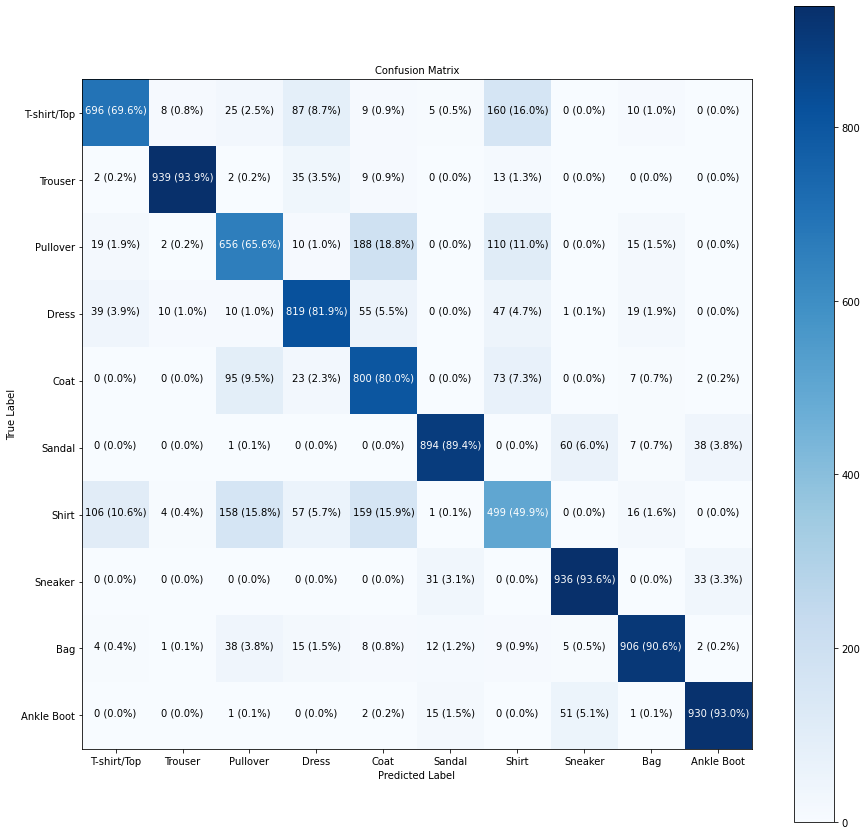

In [41]:
make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15, 15), text_size=10)

🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a function that:
* Plots a random image
* Makes a prediction on said image
* Labels the plot with the truth label and the predicted label

In [42]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it, and labels it with a prediction and truth label
    """
    
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is correct
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xlabel information (prediction/true label)
    plt.xlabel(f'Prediction: {pred_label} {100*tf.reduce_max(pred_probs):.2f}%\n(True: {true_label})', color=color)
    plt.show();

1/1 [==============================] - 0s 9ms/step


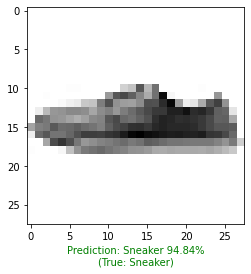

In [65]:
plot_random_image(model=model_14, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

### What Patterns Is Our Model Learning?

In [311]:
# Find the layers of our most recent model
model_14.layers

In [312]:
# Extract a particular layer
model_14.layers[1]

In [313]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.71502596, -0.06077074, -0.99763083, -1.0484312 ],
        [ 0.27732125, -0.47155362, -0.52916473,  0.02329261],
        [ 0.77524304,  0.5402765 , -1.1288569 , -0.7426155 ],
        ...,
        [-0.3945346 ,  0.4762862 , -0.2264154 ,  0.2550593 ],
        [-0.4051578 ,  0.61810106,  0.23928426, -0.503876  ],
        [ 0.2388456 ,  0.11606928, -0.12131295,  0.04352394]],
       dtype=float32),
 (784, 4))

In [314]:
model_14.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 784)               0         
                                                                 
 dense_177 (Dense)           (None, 4)                 3140      
                                                                 
 dense_178 (Dense)           (None, 4)                 20        
                                                                 
 dense_179 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector

In [315]:
biases, biases.shape

(array([ 2.4485763e-02, -6.1493268e-04, -2.7230188e-01,  8.1124896e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector also gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer. 

In [316]:
model_14.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 784)               0         
                                                                 
 dense_177 (Dense)           (None, 4)                 3140      
                                                                 
 dense_178 (Dense)           (None, 4)                 20        
                                                                 
 dense_179 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


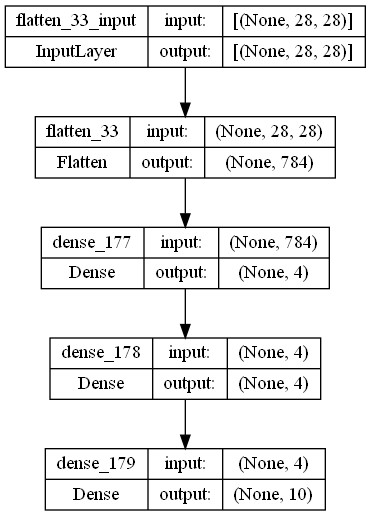

In [317]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)